# Regression Model

Written by  :  Hesham Asem

Date        :  Aug 2019

Contact     :  https://www.kaggle.com/HeshamAsem

______

Here is the Data , which is about Oil prices & its details in Brazilfor 15 years , between 2004 & 2009

we need to read the data , make data processing , then make a model to predict the (mean price) depend on other features



# Data Loading

so we need first to import needed libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

____

and since the feature written in portuguese , I translated it to English so we can understand them 


In [2]:
col_names = ['Index','Initial Date','Final Date','Region','State','Product','Number of searches','Unit of Measurment',
           'Mean Price','Default Price','Minimum Price','Maximum Price','Mean Margin','Price Standar Deviation','Mean Price Distribution',
           'Default Price Distribution','Minimum Price Distribution','Maximum Price Distribution','Distribution Standard Deviation',
           'M Factor' ,'Year']

data = pd.read_excel('2004-2019.xls' , names = col_names)  

data.head()

,Index,Initial Date,Final Date,Region,State,Product,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


How about the Shape ? 

In [3]:
data.shape

(65534, 21)

since 'Index' will do nothing in the data , lets drop it

In [0]:
data.drop(['Index'],axis=1, inplace=True)

then check data 

In [5]:
data.head()

,Initial Date,Final Date,Region,State,Product,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


__________


# Data Processing

now we need to know more about he data , lets use describe tool

In [6]:
data.describe()

,Number of searches,Mean Price,Default Price,Minimum Price,Maximum Price,Price Standar Deviation,M Factor,Year
count,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000
mean,276.064302,9.419979,0.500583,8.258743,10.728551,0.044842,6.509613,2008.929243
std,459.770339,14.292417,0.884875,12.383575,16.388597,0.024480,3.474459,2.925159
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000,1.000000,2004.000000
25%,55.000000,1.863000,0.063000,1.740000,2.100000,0.029000,3.000000,2006.000000
50%,119.000000,2.288000,0.099000,2.110000,2.580000,0.041000,7.000000,2009.000000
75%,292.000000,2.852000,0.171000,2.689000,3.190000,0.059000,10.000000,2012.000000
max,4167.000000,52.949000,7.042000,47.000000,70.000000,0.395000,12.000000,2014.000000


it`s clear that python will not calculate categorical data , only numerical values ,  also it looks we need to standrardize the numbers , but this will be done later

now lets check the types of features & to check if it contain nulls

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 20 columns):
Initial Date                       65534 non-null datetime64[ns]
Final Date                         65534 non-null datetime64[ns]
Region                             65534 non-null object
State                              65534 non-null object
Product                            65534 non-null object
Number of searches                 65534 non-null int64
Unit of Measurment                 65534 non-null object
Mean Price                         65534 non-null float64
Default Price                      65534 non-null float64
Minimum Price                      65534 non-null float64
Maximum Price                      65534 non-null float64
Mean Margin                        65534 non-null object
Price Standar Deviation            65534 non-null float64
Mean Price Distribution            65534 non-null object
Default Price Distribution         65534 non-null object
Minimum Price Di

________

we`re lucky to have no Null data , but it looks that several features its type is (object) . which might contain letters & numbers together 


lets first check 'Mean Margin' feature , which written here as Object , instead of float64


In [8]:
data['Mean Margin']

0        0.463
1        0.399
2        0.419
3        0.432
4         0.24
5        0.426
6        0.353
7        0.515
8        0.353
9        0.277
10       0.494
11       0.332
12       0.321
13       0.689
14       0.412
15       0.441
16       0.536
17       0.533
18       0.202
19       0.546
20       0.267
21       0.389
22       0.312
23       0.198
24       0.255
25       0.332
26       0.416
27       0.448
28       0.421
29       0.401
         ...  
65504        -
65505    0.446
65506    0.322
65507    0.457
65508    0.522
65509    0.378
65510    0.286
65511     0.47
65512        -
65513    0.241
65514    0.259
65515    0.175
65516    0.272
65517    0.202
65518    0.256
65519    0.236
65520    0.297
65521    0.206
65522    0.375
65523    0.298
65524    0.257
65525    0.216
65526    0.209
65527    0.224
65528    0.231
65529    0.142
65530    0.304
65531    0.341
65532     0.25
65533    0.267
Name: Mean Margin, Length: 65534, dtype: object

________

it looks that some rows contain (-) which might refer to the null value , lets see how many (-) exists


In [9]:
n = 0
for i in range(data.shape[0]) : 
    if str(data['Mean Margin'][i]) == '-' : 
        n+=1

print('There is {} null value here'.format(n))
    

There is 1493 null value here


______

around 1500 null value in Mean Margin only , so lets use simple equation to fill the nulls

In [10]:
summ = 0
n = 0

for i in range(data.shape[0]) : 
    if not str(data['Mean Margin'][i]) == '-' : 
        summ += float(data['Mean Margin'][i])
        n+=1

the_mean = summ/ n

print('the mean is {}'.format(the_mean))

for i in range(data.shape[0]) : 
    if str(data['Mean Margin'][i]) == '-' : 
      data['Mean Margin'][i] = the_mean
        


the mean is 1.7522229353070857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


_____

now lets check if there is any nulls exists

In [11]:
n = 0
for i in range(data.shape[0]) : 
    if str(data['Mean Margin'][i]) == '-' : 
        n+=1

print('There is {} null value here'.format(n))

There is 0 null value here


___________


great . now lets check if it become "float64" or not yet 


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 20 columns):
Initial Date                       65534 non-null datetime64[ns]
Final Date                         65534 non-null datetime64[ns]
Region                             65534 non-null object
State                              65534 non-null object
Product                            65534 non-null object
Number of searches                 65534 non-null int64
Unit of Measurment                 65534 non-null object
Mean Price                         65534 non-null float64
Default Price                      65534 non-null float64
Minimum Price                      65534 non-null float64
Maximum Price                      65534 non-null float64
Mean Margin                        65534 non-null object
Price Standar Deviation            65534 non-null float64
Mean Price Distribution            65534 non-null object
Default Price Distribution         65534 non-null object
Minimum Price Di

________

although it's still written here as object , let's check if any cell contain non-numbers here




In [13]:
n = 0
for i in range(data.shape[0]) : 
    if float(data['Mean Margin'][i]) == 0 : 
        n+=1

print('There is {} cell with zero value'.format(n))

There is 0 cell with zero value


_____

great , now lets repeat the same step in other non-categorical features which written as "Object" ,like  : 

Mean Price Distribution            
Default Price Distribution         
Minimum Price Distribution         
Maximum Price Distribution         
Distribution Standard Deviation    

In [14]:
a = b = c= d = e  = 0
for i in range(data.shape[0]) : 
    if str(data['Mean Price Distribution'][i]) == '-' : 
        a+=1
    if str(data['Default Price Distribution'][i]) == '-' : 
        b+=1
    if str(data['Minimum Price Distribution'][i]) == '-' : 
        c+=1
    if str(data['Maximum Price Distribution'][i]) == '-' : 
        d+=1
    if str(data['Distribution Standard Deviation'][i]) == '-' :  
        e+=1

print('There is {} null value here'.format(a))
print('There is {} null value here'.format(b))
print('There is {} null value here'.format(c))                
print('There is {} null value here'.format(d))
print('There is {} null value here'.format(e))                
    

There is 1471 null value here
There is 1471 null value here
There is 1471 null value here
There is 1471 null value here
There is 1471 null value here


______

Then lets make the mean in those cells in the same way  (this might take few mins)

In [15]:
a_summ = b_summ = c_summ = d_summ = e_summ = 0
n = 1471

for i in range(data.shape[0]) : 
    if not str(data['Mean Price Distribution'][i]) == '-' : 
        a_summ += float(data['Mean Price Distribution'][i])
        
    if not str(data['Default Price Distribution'][i]) == '-' : 
        b_summ += float(data['Default Price Distribution'][i])

    if not str(data['Minimum Price Distribution'][i]) == '-' : 
        c_summ += float(data['Minimum Price Distribution'][i])
        
    if not str(data['Maximum Price Distribution'][i]) == '-' : 
        d_summ += float(data['Maximum Price Distribution'][i])
        
    if not str(data['Distribution Standard Deviation'][i]) == '-' : 
        e_summ += float(data['Distribution Standard Deviation'][i])
        

      
        
a_mean = a_summ/ n
b_mean = b_summ/ n
c_mean = c_summ/ n
d_mean = d_summ/ n
e_mean = e_summ/ n

for i in range(data.shape[0]) : 
    if str(data['Mean Price Distribution'][i]) == '-' : 
        data['Mean Price Distribution'][i] = a_mean

    if str(data['Default Price Distribution'][i]) == '-' : 
        data['Default Price Distribution'][i] = b_mean
        
    if str(data['Minimum Price Distribution'][i]) == '-' : 
        data['Minimum Price Distribution'][i] = c_mean
        
    if str(data['Maximum Price Distribution'][i]) == '-' : 
        data['Maximum Price Distribution'][i] = d_mean
    
    if str(data['Distribution Standard Deviation'][i]) == '-' : 
        data['Distribution Standard Deviation'][i] = e_mean
        



        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

____________________

# Categorical Features

now lets move to convert Categorical features , into numerical values , so we can enter them in the model

we have 4 Categorical features , which are : 

Region  ,  State    ,   Product    ,   Unit of Measurment


so in each feature , we'll check unique values , then convert it using dictionary & map fucntion , in a new column , and them drop the original column

let's start with Region : 


In [16]:
data['Region'].unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

In [0]:
Region_dict = {'CENTRO OESTE': 0,'NORDESTE':1, 'NORTE':2, 'SUDESTE':3, 'SUL':4}
data['Region Code'] = data['Region'].map(Region_dict)

data.drop(['Region'],axis=1, inplace=True)




now lets check the data itsself 


In [18]:
data.head()

,Initial Date,Final Date,State,Product,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year,Region Code
0,2004-05-09,2004-05-15,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004,0
1,2004-05-09,2004-05-15,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004,0
2,2004-05-09,2004-05-15,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004,0
3,2004-05-09,2004-05-15,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004,0
4,2004-05-09,2004-05-15,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004,1



___________________

now lets repeat it in State 


In [19]:
data['State'].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [20]:
State_dict = {'DISTRITO FEDERAL':0, 'GOIAS':1, 'MATO GROSSO':2, 'MATO GROSSO DO SUL':3,
       'ALAGOAS':4, 'BAHIA':5, 'CEARA':6, 'MARANHAO':7, 'PARAIBA':8, 'PERNAMBUCO':9,
       'PIAUI':10, 'RIO GRANDE DO NORTE':11, 'SERGIPE':12, 'ACRE':13, 'AMAPA':14,
       'AMAZONAS':15, 'PARA':16, 'RONDONIA':17, 'RORAIMA':18, 'TOCANTINS':19,
       'ESPIRITO SANTO':20, 'MINAS GERAIS':21, 'RIO DE JANEIRO':22, 'SAO PAULO':23,
       'PARANA':24, 'RIO GRANDE DO SUL':25, 'SANTA CATARINA':26}
data['State Code'] = data['State'].map(State_dict)

data.drop(['State'],axis=1, inplace=True)

data.head()


,Initial Date,Final Date,Product,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year,Region Code,State Code
0,2004-05-09,2004-05-15,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004,0,0
1,2004-05-09,2004-05-15,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004,0,1
2,2004-05-09,2004-05-15,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004,0,2
3,2004-05-09,2004-05-15,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004,0,3
4,2004-05-09,2004-05-15,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004,1,4


In [21]:
data['Product'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'أ“LEO DIESEL',
       'أ“LEO DIESEL S10'], dtype=object)


_________

then Product . . 


In [22]:
Product_dict = {'ETANOL HIDRATADO':0, 'GASOLINA COMUM':1, 'GLP':2, 'GNV':3, 'أ“LEO DIESEL':4,
       'أ“LEO DIESEL S10':5}

data['Product Code'] = data['Product'].map(Product_dict)

data.drop(['Product'],axis=1, inplace=True)

data.head()

,Initial Date,Final Date,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year,Region Code,State Code,Product Code
0,2004-05-09,2004-05-15,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004,0,0,0
1,2004-05-09,2004-05-15,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004,0,1,0
2,2004-05-09,2004-05-15,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004,0,2,0
3,2004-05-09,2004-05-15,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004,0,3,0
4,2004-05-09,2004-05-15,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004,1,4,0



_________

and Unit of measurment

In [23]:
data['Unit of Measurment'].unique()

array(['R$/l', 'R$/13Kg', 'R$/m3'], dtype=object)

In [24]:
Unit_dict = {'R$/l':0, 'R$/13Kg':1, 'R$/m3':2}

data['Unit Code'] = data['Unit of Measurment'].map(Unit_dict)

data.drop(['Unit of Measurment'],axis=1, inplace=True)

data.head()

,Initial Date,Final Date,Number of searches,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year,Region Code,State Code,Product Code,Unit Code
0,2004-05-09,2004-05-15,127,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004,0,0,0,0
1,2004-05-09,2004-05-15,387,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004,0,1,0,0
2,2004-05-09,2004-05-15,192,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004,0,2,0,0
3,2004-05-09,2004-05-15,162,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004,0,3,0,0
4,2004-05-09,2004-05-15,103,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004,1,4,0,0




________

# Handling Date 

since we have here 2 columns for date , which is Initial date & Final Date , let;s first check how many rows when the year at those two columns are mismatch 


In [25]:
mismatch=0
for i in range(data.shape[0])  : 
    if not (int(data['Initial Date'][i].year)  == int(data['Final Date'][i].year)) :
        mismatch +=1
        
print( 'Year mismatch amount is {}'.format(mismatch))

Year mismatch amount is 1042


____

since it's kinda ew number comparing with the 65 thousand rows , so we can use only one of them , which will be the Final Date

also since the Day will not affect so much in the price , so let's only use the month & the year in 2 new separated columns

In [0]:
Years = []
Months = []
for i in range(data.shape[0])  : 
    Years.append(str(data['Final Date'][i])[:4])
    Months.append(str(data['Final Date'][i])[5:7])       

In [0]:
data['Final Year'] = Years
data['Final Months'] = Months

data.drop(['Initial Date','Final Date','Year'],axis=1, inplace=True)




now lets  check the final data 


In [28]:
data.head()

,Number of searches,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Region Code,State Code,Product Code,Unit Code,Final Year,Final Months
0,127,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,0,0,0,0,2004,05
1,387,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,0,1,0,0,2004,05
2,192,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,0,2,0,0,2004,05
3,162,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,0,3,0,0,2004,05
4,103,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,1,4,0,0,2004,05



______

# Representing Data

let's have a quick look to few features distribution , using countplot tool from Seaborn library . .


here for Region Code

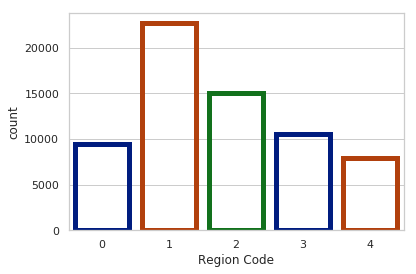

In [29]:
sns.countplot(x="Region Code", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))



and here for State 

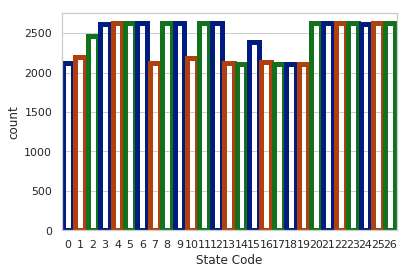

In [30]:
sns.countplot(x="State Code", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))


then the Product

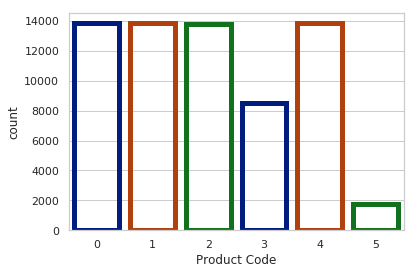

In [31]:
sns.countplot(x="Product Code", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))


and for the Year

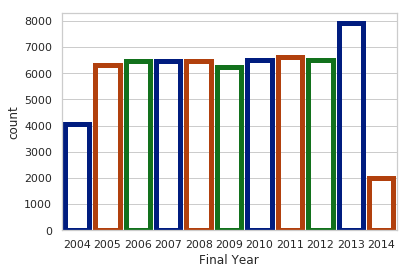

In [32]:
sns.countplot(x="Final Year", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))


_____________

# Splitting Data


now lets use determine X & y data , then use Sklearn , to split the data into Train & test


In [33]:
X = data.drop(['Mean Price'], axis=1, inplace=False)
print('X shape is ' , X.shape)
X.head()

X shape is  (65534, 18)


,Number of searches,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Region Code,State Code,Product Code,Unit Code,Final Year,Final Months
0,127,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,0,0,0,0,2004,05
1,387,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,0,1,0,0,2004,05
2,192,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,0,2,0,0,2004,05
3,162,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,0,3,0,0,2004,05
4,103,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,1,4,0,0,2004,05


In [34]:
y = data['Mean Price']

print('y shape is ' , y.shape)
y.head()


y shape is  (65534,)


0    1.288
1    1.162
2    1.389
3    1.262
4    1.181
Name: Mean Price, dtype: float64

___

then split it

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)


print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (49150, 18)
X_test shape is  (16384, 18)
y_train shape is  (49150,)
y_test shape is  (16384,)


____

# Building the Model

let's use 3 regerssion Models using Sklearn , to check which is suitable . . 

first use Linear Regression



In [36]:
LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

____

now how about the Train & Test Scores ? 


In [37]:
#Calculating Details
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))


Linear Regression Train Score is :  0.9984663922036023
Linear Regression Test Score is :  0.9985163318823426



_____

looks great which might refer to some kind of overfitt , now lets check predicted values

In [38]:
y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Predicted Value for Linear Regression is :  [38.69705869 40.50106793  2.67158521  2.11160523  1.64262891  2.75695631
  1.481403    2.92850533 32.54062596  2.37254354]


____

now lets move to SVR Model (this will take few mins)


In [39]:
'''
sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001,
                C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False,max_iter=-1)
'''

SVRModel = SVR(C = 1.0 ,epsilon=1,kernel = 'rbf') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

____

how about scores ? 


In [40]:
print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))

SVRModel Train Score is :  0.6053840513616287
SVRModel Test Score is :  0.5654099811670861



___

looks very far from being suitable choice. . 


and the predicted Values . . 



In [41]:
#Calculating Prediction
y_pred = SVRModel.predict(X_test)
print('Predicted Value for SVRModel is : ' , y_pred[:10])

Predicted Value for SVRModel is :  [23.48107827 12.11991128  2.47365348  5.11238677  2.58231139  4.17026988
  2.6633477   3.3028066  10.44398107  3.45583422]



____

now let's use Decision Tree Regressor



In [42]:
'''
sklearn.tree.DecisionTreeRegressor(criterion='mse’, splitter=’best’, max_depth=None,min_samples_split=2,
                                   min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_features=None,
                                   random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                   min_impurity_split=None, presort=False)
'''

DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=33, splitter='best')

____

calculating Scores 


In [43]:
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))

DecisionTreeRegressor Train Score is :  0.9951981369269255
DecisionTreeRegressor Test Score is :  0.9952870517639558



___

fine numbers , whih pretty close to the Linear Regression . . 


and Predicted Values

In [44]:
y_pred = DecisionTreeRegressorModel.predict(X_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:10])

Predicted Value for DecisionTreeRegressorModel is :  [40.01172331 45.40286953  2.75246335  1.92037696  1.48863003  2.75246335
  1.48863003  2.75246335 32.69311401  2.36297595]


___

# Final


it looks that using Linear Regression , or Decision Tree will be better in prediction the mean price , but may be changing some parameters in other models bring better accuracy . 


Hope you find this kernel useful !
